In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
sns.set_style('darkgrid')
plt.rcParams['font.size']=15
plt.rcParams['figure.figsize']=(10,7)
plt.rcParams['figure.facecolor']='#FFE5B4'

In [110]:
df=pd.read_csv('2022.csv')

In [111]:
df.head()

,Country name,Regional indicator,Happiness score,Standard error of ladder score,upperwhisker,lowerwhisker,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Corruption level,Dystopia level,Social support.1,Freedom to make life choices.1,Generosity
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,0.186,2.43,1.106,0.691,0.124
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.179,2.43,1.108,0.686,0.208
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.292,2.43,1.079,0.653,0.204
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.673,2.43,1.172,0.698,0.293
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.338,2.43,1.079,0.647,0.302


In [35]:
datacolumn=['Country name','Regional indicator','Happiness score','Dystopia level','GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Corruption level']

In [36]:
df=df[datacolumn].copy()

In [37]:
df.head()

,Country name,Regional indicator,Happiness score,Dystopia level,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Corruption level
0,Finland,Western Europe,7.842,2.43,10.775,0.954,72.0,0.949,0.124,0.186
1,Denmark,Western Europe,7.620,2.43,10.933,0.954,72.7,0.946,0.208,0.179
2,Switzerland,Western Europe,7.571,2.43,11.117,0.942,74.4,0.919,0.204,0.292
3,Iceland,Western Europe,7.554,2.43,10.878,0.983,73.0,0.955,0.293,0.673
4,Netherlands,Western Europe,7.464,2.43,10.932,0.942,72.4,0.913,0.302,0.338


In [38]:
#Visual representation which explains relationship between happiness and GDP

df.isnull().sum()

Country name                    0
Regional indicator              0
Happiness score                 0
Dystopia level                  0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Corruption level                0
dtype: int64

Text(0, 0.5, 'GDP per capita')

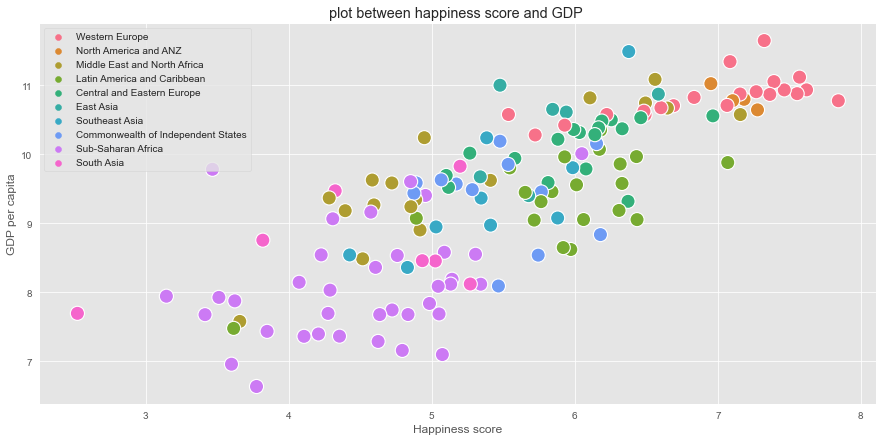

In [39]:
 #plot between happiness and GDP
plt.style.use('ggplot')
plt.figure(figsize=(15,7))
plt.title('plot between happiness score and GDP ')
sns.scatterplot(data=df,x="Happiness score",y="GDP per capita",hue='Regional indicator',s=200)

plt.legend(loc='upper left',fontsize='10')
plt.xlabel('Happiness score')
plt.ylabel('GDP per capita')
    




In [40]:
#GDP for every region computation
Regional_GDP=df.groupby("Regional indicator")["GDP per capita"].sum()
print(Regional_GDP)

Regional indicator
Central and Eastern Europe            171.854
Commonwealth of Independent States    112.822
East Asia                              62.206
Latin America and Caribbean           187.400
Middle East and North Africa          164.324
North America and ANZ                  43.238
South Asia                             60.778
Southeast Asia                         84.793
Sub-Saharan Africa                    290.707
Western Europe                        227.277
Name: GDP per capita, dtype: float64


Text(0, 0.5, '')

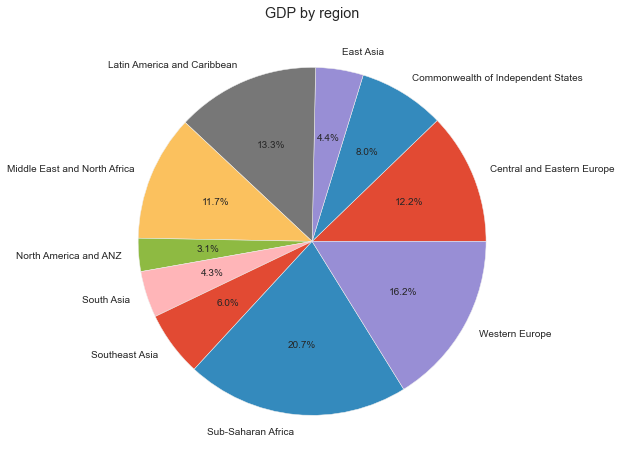

In [41]:
#Visulisation of GDP per every region
Regional_GDP.plot.pie(autopct='%1.1f%%')
plt.title('GDP by region')
plt.ylabel("")


In [42]:
#Total countries

total_country=df.groupby("Regional indicator")["Country name"].count()
print(total_country)

Regional indicator
Central and Eastern Europe            17
Commonwealth of Independent States    12
East Asia                              6
Latin America and Caribbean           20
Middle East and North Africa          17
North America and ANZ                  4
South Asia                             7
Southeast Asia                         9
Sub-Saharan Africa                    36
Western Europe                        21
Name: Country name, dtype: int64


<AxesSubplot:>

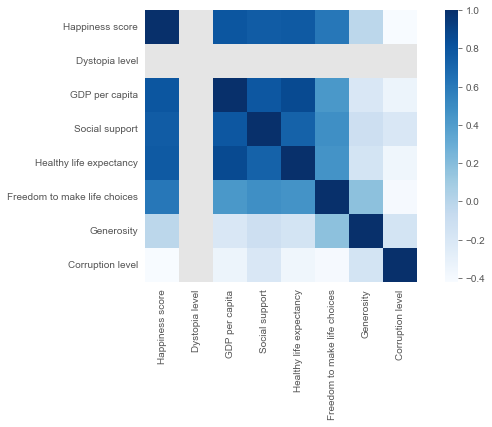

In [43]:
cor=df.corr(method="pearson")
f,ax=plt.subplots(figsize=(10,5))
sns.heatmap(cor,mask=np.zeros_like(cor,dtype=bool),cmap="Blues",square=True,ax=ax)

In [44]:
corruption=df.groupby("Regional indicator")[["Corruption level"]].mean()
corruption

,Corruption level
Regional indicator,
Central and Eastern Europe,0.850529
Commonwealth of Independent States,0.725083
East Asia,0.683333
Latin America and Caribbean,0.792600
Middle East and North Africa,0.762235
North America and ANZ,0.449250
South Asia,0.797429
Southeast Asia,0.709111
Sub-Saharan Africa,0.765944


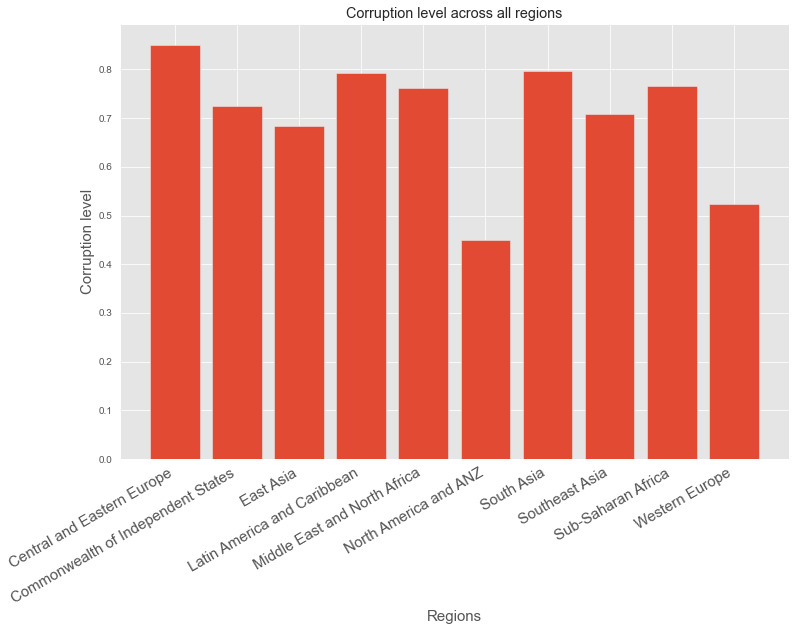

In [78]:
plt.rcParams['figure.figsize']=(12,8)
plt.title("Corruption level across all regions")
plt.xlabel("Regions",fontsize=15)
plt.ylabel("Corruption level",fontsize=15)
plt.xticks(rotation=30,ha='right',fontsize=15)
plt.bar(corruption.index,corruption['Corruption level'])
plt.show()

In [61]:
top_10=df.head(10)
bottom_10=df.tail(10)


C:\Users\MINJA\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  """
C:\Users\MINJA\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  del sys.path[0]


Text(606.1068181818181, 0.5, 'Life expectancy')

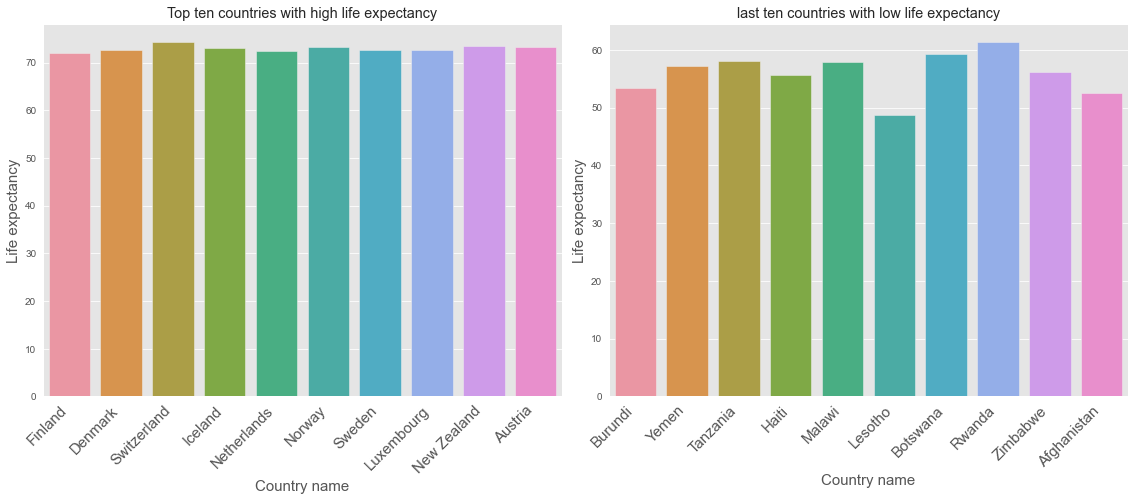

In [102]:
fig,axes=plt.subplots(1,2,figsize=(16,6))
plt.tight_layout(pad=2)
xlabels=top_10['Country name']
axes[0].set_title('Top ten countries with high life expectancy')
axes[0].set_xticklabels(xlabels,rotation=45,ha='right',fontsize=15)
sns.barplot(x=top_10['Country name'],y=top_10['Healthy life expectancy'],ax=axes[0])
axes[0].set_xlabel('Country name',fontsize=15)
axes[0].set_ylabel('Life expectancy',fontsize=15)


xlabels=bottom_10['Country name']
axes[1].set_title('last ten countries with low life expectancy')
axes[1].set_xticklabels(xlabels,rotation=45,ha='right',fontsize=15)
sns.barplot(x=bottom_10['Country name'],y=bottom_10['Healthy life expectancy'],ax=axes[1])
axes[1].set_xlabel('Country name',fontsize=15)
axes[1].set_ylabel('Life expectancy',fontsize=15)

Text(0, 0.5, 'Happiness score')

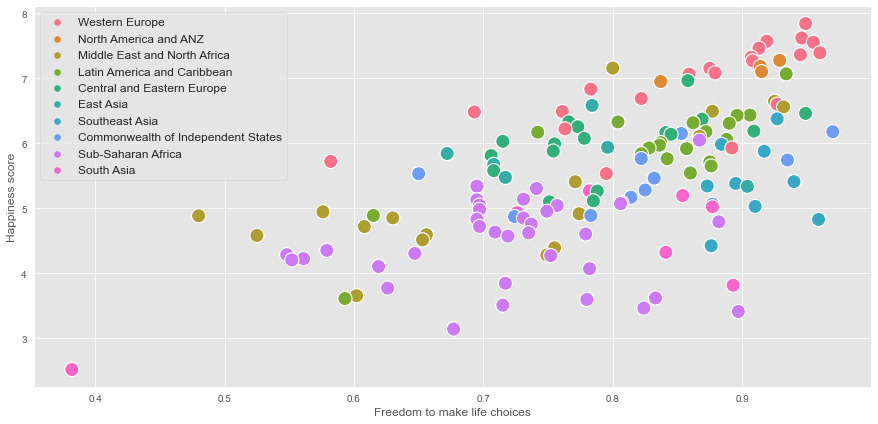

In [79]:
plt.rcParams['figure.figsize']=(15,7)
sns.scatterplot(data=df,x='Freedom to make life choices',y='Happiness score',hue='Regional indicator',s=200)

plt.legend(loc='upper left',fontsize='12')
plt.xlabel('Freedom to make life choices')
plt.ylabel('Happiness score')


<BarContainer object of 10 artists>

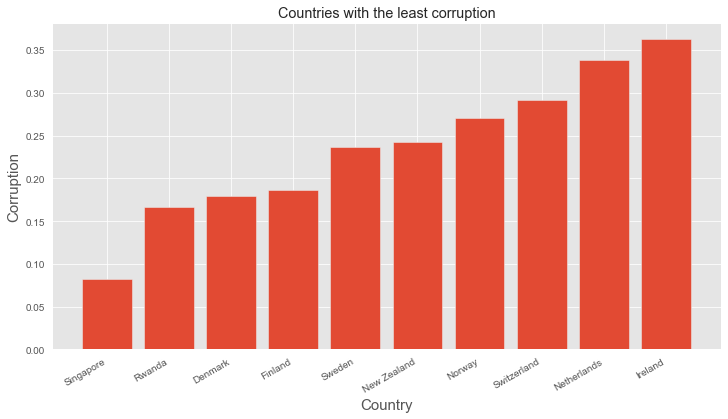

In [101]:
corrupt_country = df.sort_values(by='Corruption level').head(10)
plt.rcParams['figure.figsize']=(12,6)
plt.title('Countries with the least corruption')
plt.xlabel('Country',fontsize=15)
plt.ylabel('Corruption',fontsize=15)
plt.xticks(rotation=30,ha='right')
plt.bar(corrupt_country['Country name'],corrupt_country['Corruption level'])

Text(0, 0.5, 'Corruption')

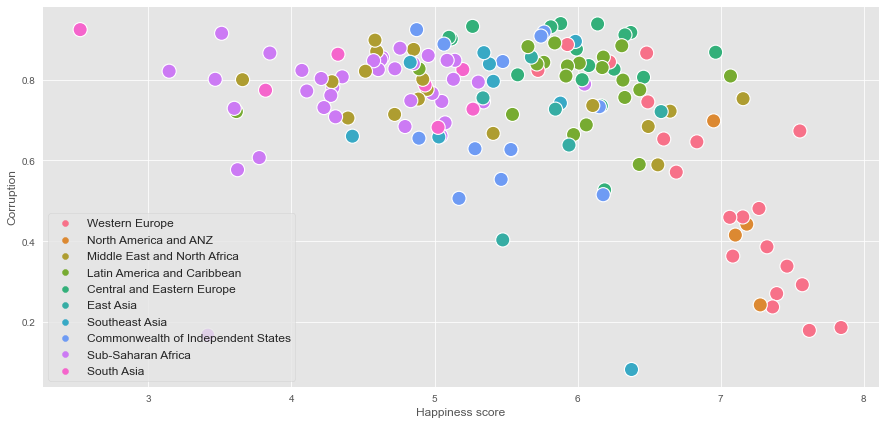

In [109]:
#Corruption vs Happiness

plt.rcParams['figure.figsize']=(15,7)
sns.scatterplot(data=df,x='Happiness score',y='Corruption level',hue='Regional indicator',s=200)
plt.legend(loc='lower left',fontsize ='12')
plt.xlabel('Happiness score')
plt.ylabel('Corruption')